In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error

# models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# ignore warnings
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

### DO NOTE

We are only plotting for Seasonals since data cleaning for seasons dropped all non-seasonals

In [87]:
# set categorical types
category_cols = ['Rating','Type','Status','Source','season','Studio']
int_cols = ['Rank','Episodes','Scored By','Popularity','Favorites','Members','Premier_Month']
float_cols = ['Score']

genres = ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi']
studios = ['Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio']

types = dict([(i,'category') for i in category_cols])

df = pd.read_csv('cleaned_data.csv')
df = df.astype(types)

### Split the df

In [88]:
# calculate number of datapoints for train set
def split_dataset(df:object, train_set_ratio:float):
    """splits a dataset, with the size of train_set being determined by train_set_ratio
    @param df: The dataframe to split
    @param train_set_ratio: Float between 0 and 1 to determine the ratio of the df to be the train_set
    @returns train_set: The train set
    @returns test_set: The test set"""

    # shuffle the data so we don't just take the first 20% as test set.
    df = df.sample(frac=1).reset_index(drop=True)

    # calculate the splits
    entry_count = len(df.index)
    train_count = (int)(entry_count*train_set_ratio)

    # split
    train_set = df[:train_count]
    test_set = df[train_count:]

    print(f'total: {entry_count}\ntrain: {train_set.shape}\ntest: {test_set.shape}')
    return train_set, test_set

train_set, test_set = split_dataset(df,0.8)

total: 4281
train: (3424, 101)
test: (857, 101)


### Plotting the numerical data

For Premier Month: Months since 1900 that the show premiered in

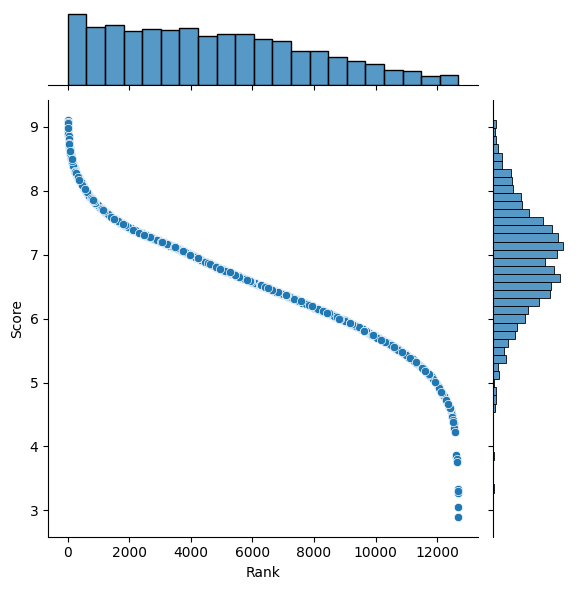

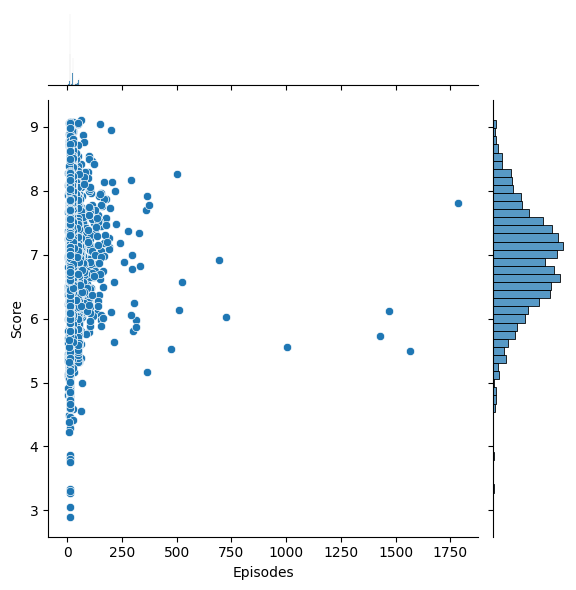

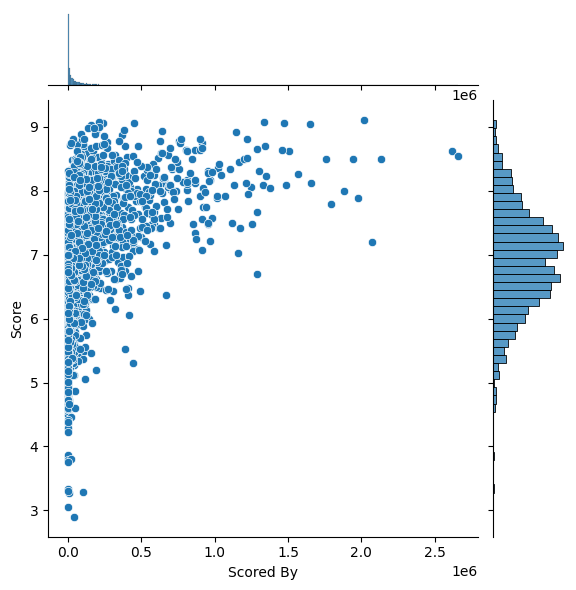

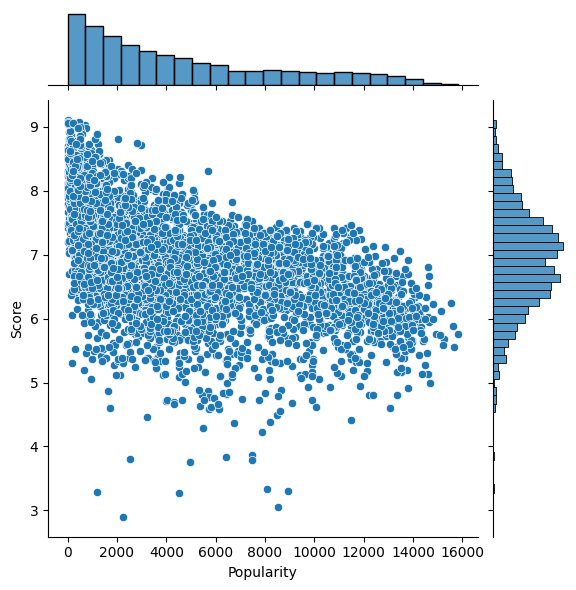

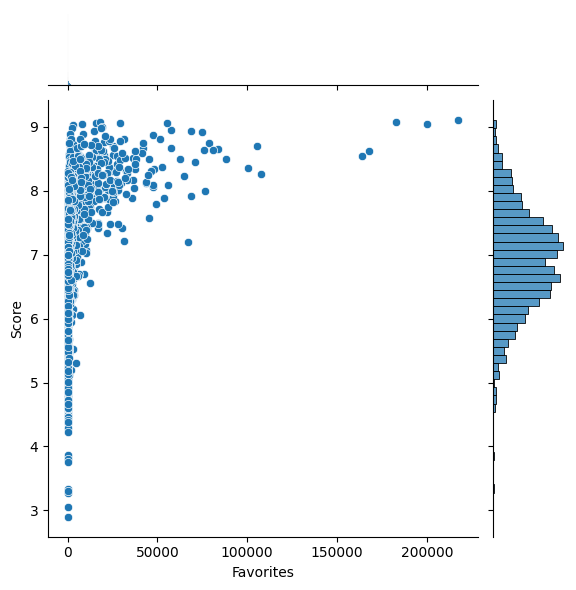

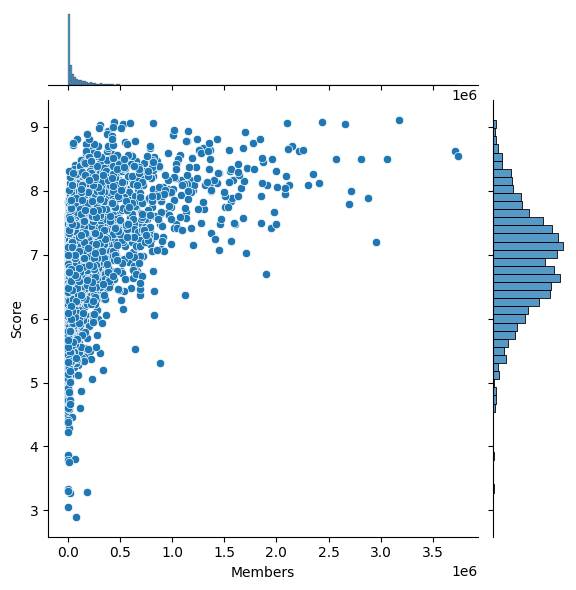

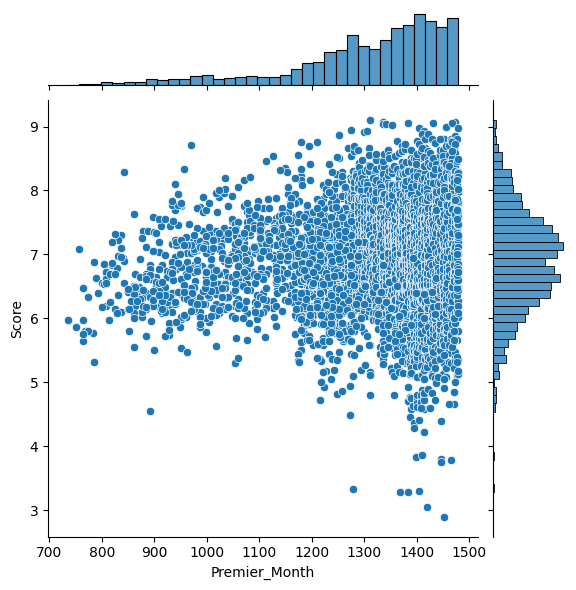

In [89]:
for y in int_cols:
    sb.jointplot(x=df[y],y=df['Score'])

### Linear Regression code yanked from Exercise 4

In [90]:
def prediction_plot(x:str, train_set:pd.DataFrame, test_set:pd.DataFrame, results:dict):
    """just a helper function to plot predictions against actuals"""
    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].scatter(train_set[[x]], results['train'], color = "blue")
    axes[0].plot(train_set[[x]], train_set[[x]], linewidth = 1, color = 'black')
    axes[0].set_xlabel(f"True values of {x}")
    axes[0].set_ylabel(f"Predicted values of {x}")
    axes[1].scatter(test_set[[x]], results['test'], color = "green")
    axes[1].plot(test_set[[x]], test_set[[x]], linewidth = 1, color='black')
    axes[1].set_xlabel(f"True values of {x}")
    axes[1].set_ylabel(f"Predicted values of {x}")
    plt.show()

def linear_regression(x:str, y:str, train_set:pd.DataFrame, test_set:pd.DataFrame):
    """does linear regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    linreg = LinearRegression()
    # check if list
    if type(y) is list:
        linreg.fit(train_set[y],train_set[[x]])
    else:
        linreg.fit(train_set[[y]],train_set[[x]])

    # print the intercept & coef in the form y = m*x + c
    print(f"""Line Equation
        {x} = {linreg.coef_}*{y} + {linreg.intercept_}
        """)

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = linreg.predict(datay)
        
        r2 = linreg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}
        """)
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

### Performing Linear Regression

For Premier Month: Months passed since 1900 

=============== Rank ===============
Line Equation
        Score = [[-0.00024799]]*Rank + [8.06214258]
        
train dataset
        R^2: 0.954499789526426
        MSE: 0.029329006445577115
        
test dataset
        R^2: 0.9595011281654064
        MSE: 0.02556910896066836
        


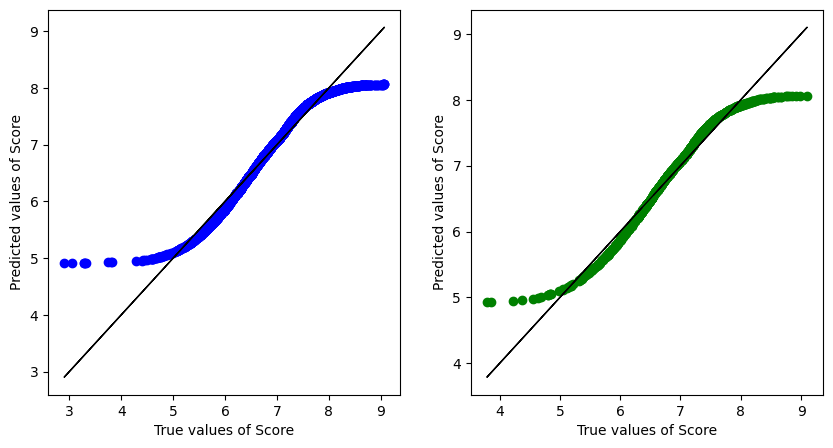

=============== Episodes ===============
Line Equation
        Score = [[7.16133166e-06]]*Episodes + [6.89540445]
        
train dataset
        R^2: 3.387469313942404e-07
        MSE: 0.6445903481589415
        
test dataset
        R^2: -0.0012435043817076163
        MSE: 0.6321387016472252
        


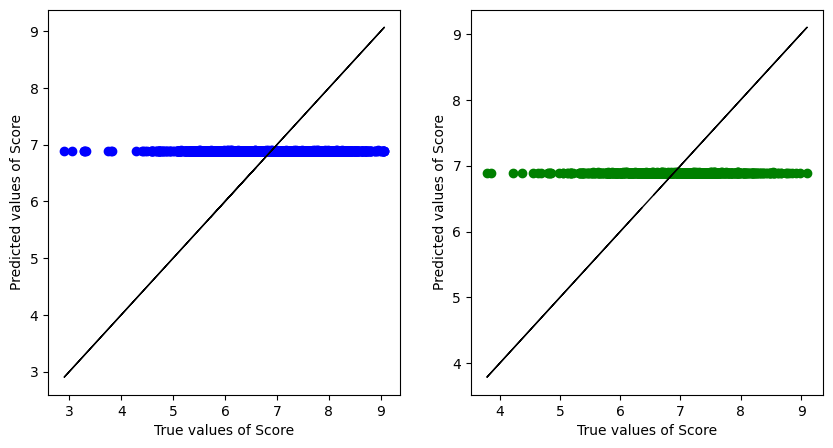

=============== Scored By ===============
Line Equation
        Score = [[1.63707404e-06]]*Scored By + [6.7577795]
        
train dataset
        R^2: 0.16895448848997008
        MSE: 0.5356840970615199
        
test dataset
        R^2: 0.17874980545217878
        MSE: 0.518499275587885
        


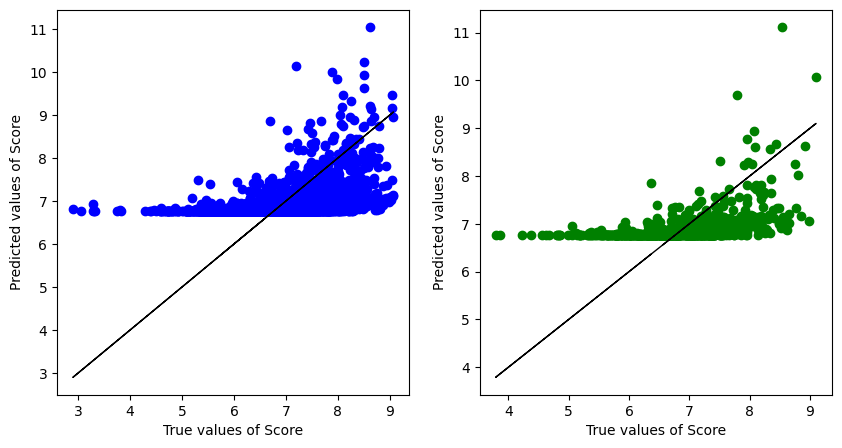

=============== Popularity ===============
Line Equation
        Score = [[-0.00011061]]*Popularity + [7.40506255]
        
train dataset
        R^2: 0.2929680582269385
        MSE: 0.4557461198895898
        
test dataset
        R^2: 0.28671177311378804
        MSE: 0.4503370974901269
        


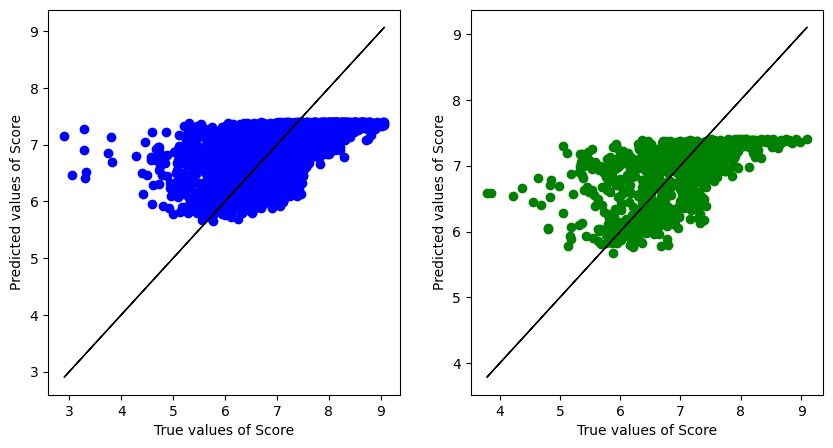

=============== Favorites ===============
Line Equation
        Score = [[3.12565582e-05]]*Favorites + [6.82892394]
        
train dataset
        R^2: 0.124857215539802
        MSE: 0.5641087832141038
        
test dataset
        R^2: 0.0934169541870341
        MSE: 0.5723744793425549
        


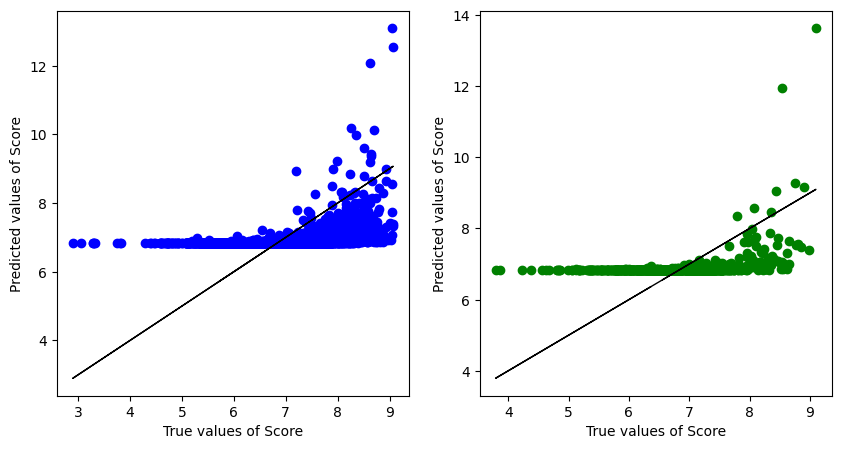

=============== Members ===============
Line Equation
        Score = [[1.10322263e-06]]*Members + [6.71592693]
        
train dataset
        R^2: 0.20511833384048694
        MSE: 0.5123732234997772
        
test dataset
        R^2: 0.21649466704278597
        MSE: 0.49466892093856835
        


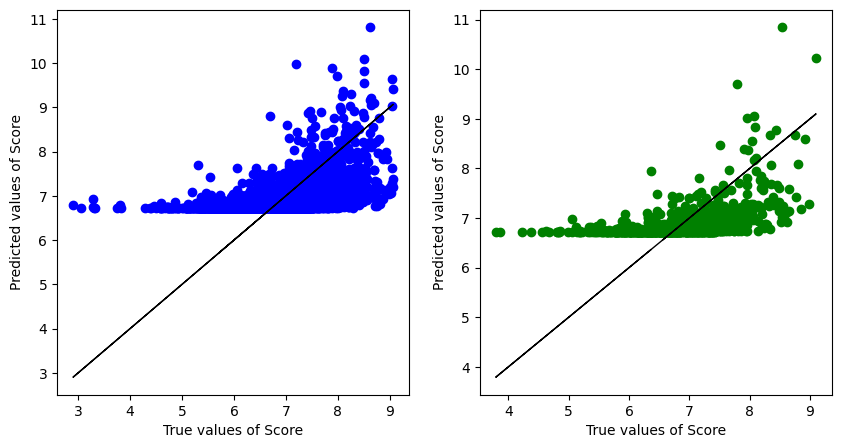

=============== Premier_Month ===============
Line Equation
        Score = [[0.00031072]]*Premier_Month + [6.49113812]
        
train dataset
        R^2: 0.0033234797297635454
        MSE: 0.6424482828302185
        
test dataset
        R^2: 0.0014860492655957014
        MSE: 0.6304153880964937
        


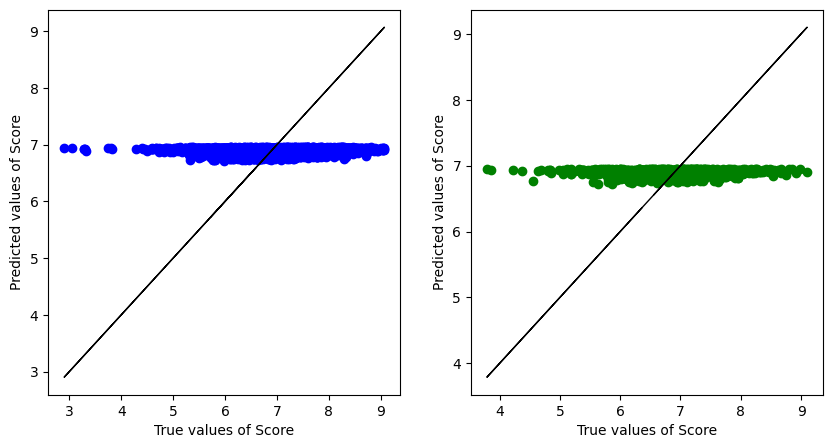

Rank regression
0 dataset
        R^2: 0.954499789526426
        MSE: 0.029329006445577115
        
1 dataset
        R^2: 0.9595011281654064
        MSE: 0.02556910896066836
        
Episodes regression
0 dataset
        R^2: 3.387469313942404e-07
        MSE: 0.6445903481589415
        
1 dataset
        R^2: -0.0012435043817076163
        MSE: 0.6321387016472252
        
Scored By regression
0 dataset
        R^2: 0.16895448848997008
        MSE: 0.5356840970615199
        
1 dataset
        R^2: 0.17874980545217878
        MSE: 0.518499275587885
        
Popularity regression
0 dataset
        R^2: 0.2929680582269385
        MSE: 0.4557461198895898
        
1 dataset
        R^2: 0.28671177311378804
        MSE: 0.4503370974901269
        
Favorites regression
0 dataset
        R^2: 0.124857215539802
        MSE: 0.5641087832141038
        
1 dataset
        R^2: 0.0934169541870341
        MSE: 0.5723744793425549
        
Members regression
0 dataset
        R^2: 0.2051183338404869

In [91]:
regs = dict([(y , {}) for y in int_cols])
for y in int_cols:
    regs[y]['r2'], regs[y]['mse'] = linear_regression('Score',y,train_set=train_set, test_set=test_set)

for name, res in regs.items():
    print(f"{name} regression")
    for i in range(len(res['r2'])):
        print(f"""{i} dataset
        R^2: {res['r2'][i]}
        MSE: {res['mse'][i]}
        """)


### Categorical Data

For seasons:

    0: Winter
    1: Spring
    2: Summer
    3: Autumn

In [92]:
def plot_categories(x,y):
    """plot the boxplot of x against y, as well as the countplot of y.
    @param x: The variable to be investigated
    @param y: The categorical data"""
    print(f'=============== {y} ===============')
    df2 = df[[y, x]].astype({y:'category'}) # need to set variable as category
    cats = df2[y].cat.categories
    plt.figure(figsize=(8,4))
    sb.countplot(data=df2[y])
    plt.show()
    print(f'categories: {len(cats)}')

    plt.figure(figsize=(8,4))
    sb.boxplot(data=df2, x=x,y=y,orient='h')
    plt.show()

=============== Rating ===============


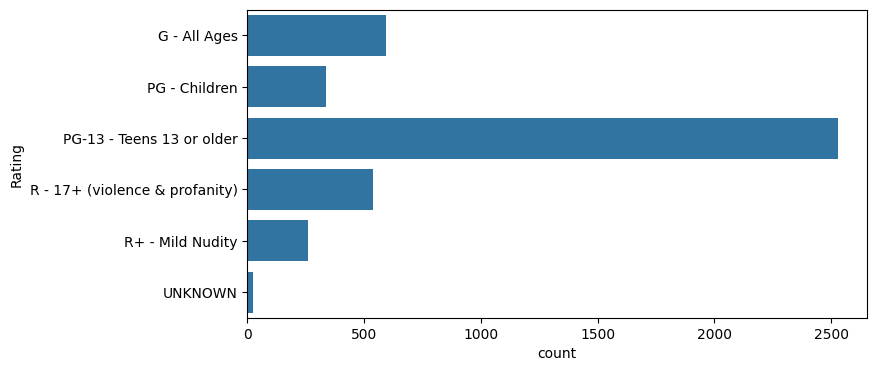

categories: 6


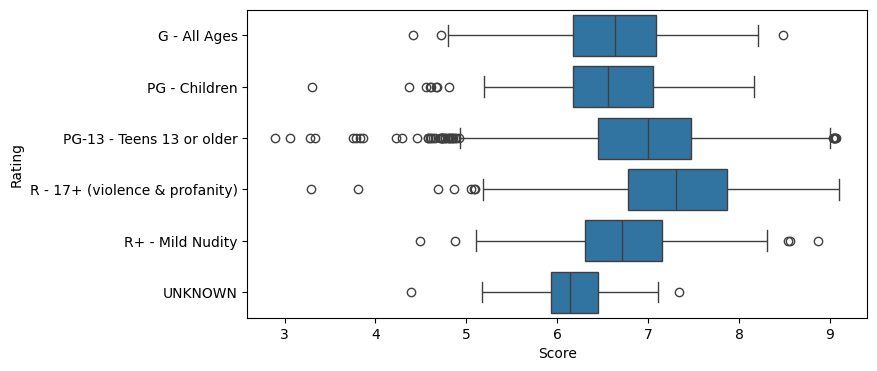

=============== Type ===============


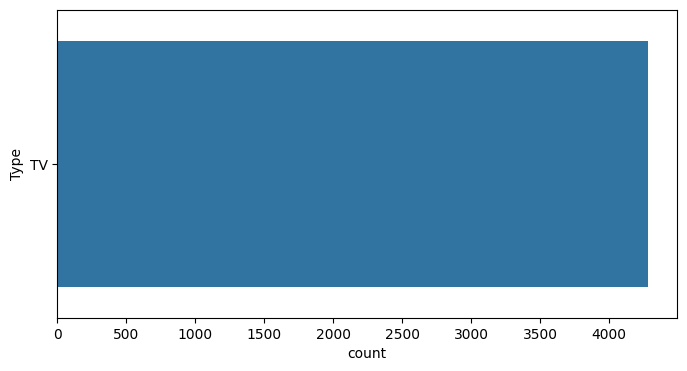

categories: 1


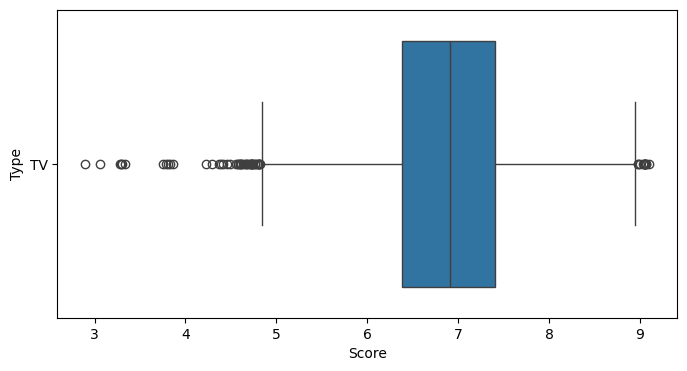

=============== Status ===============


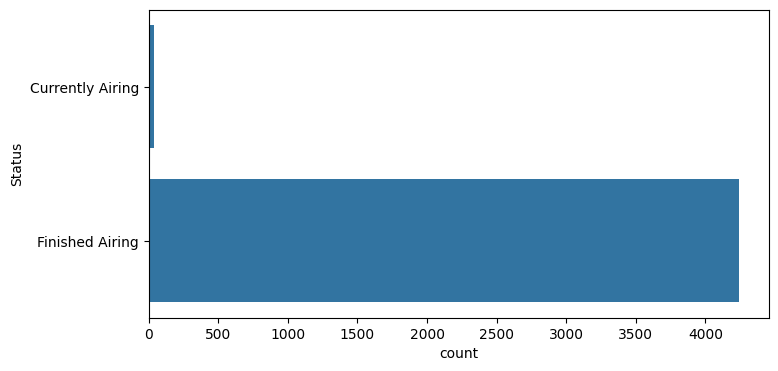

categories: 2


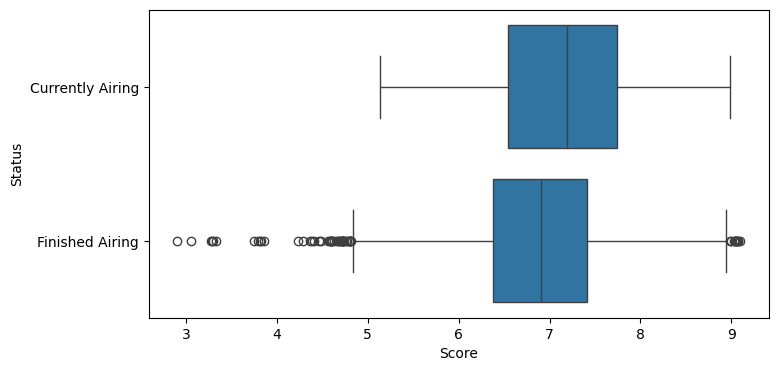

=============== Source ===============


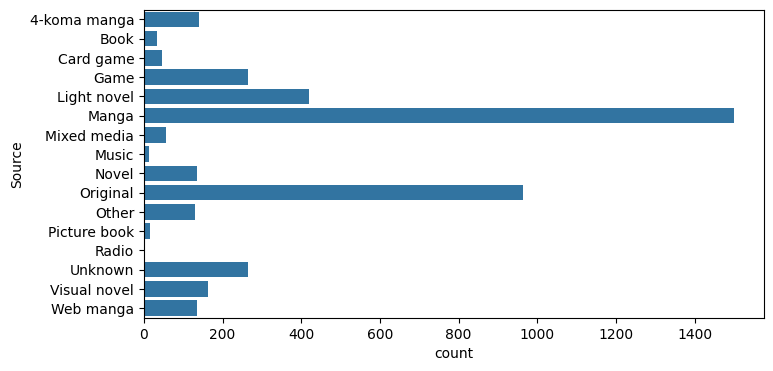

categories: 16


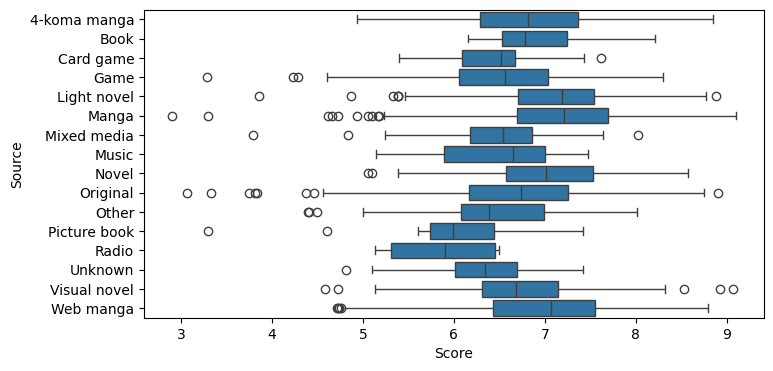

=============== season ===============


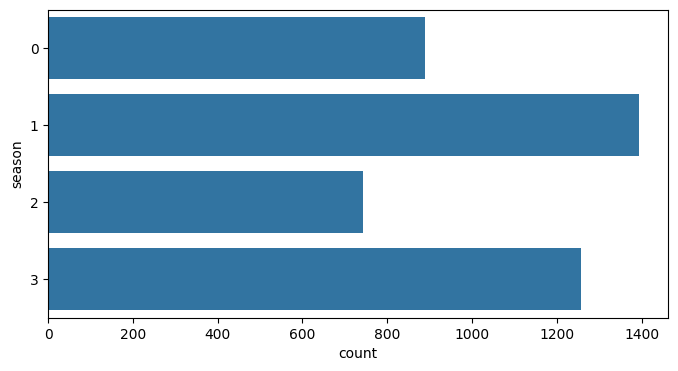

categories: 4


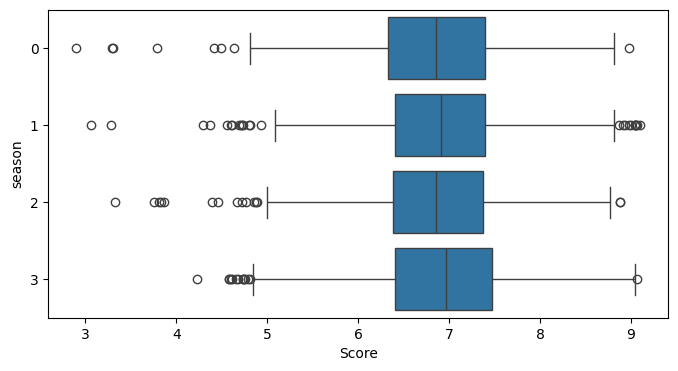

=============== Studio ===============


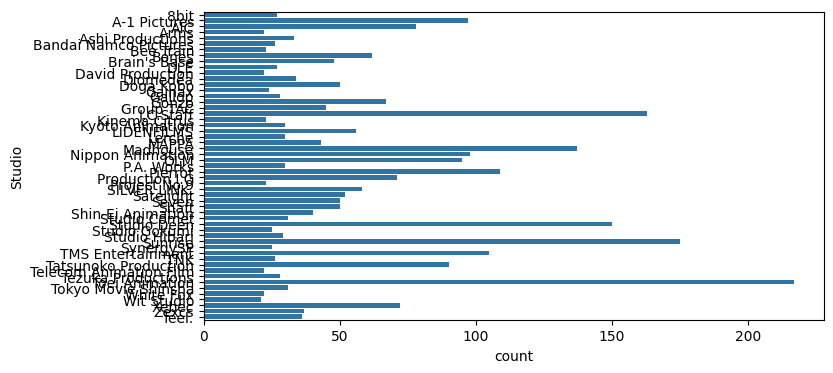

categories: 53


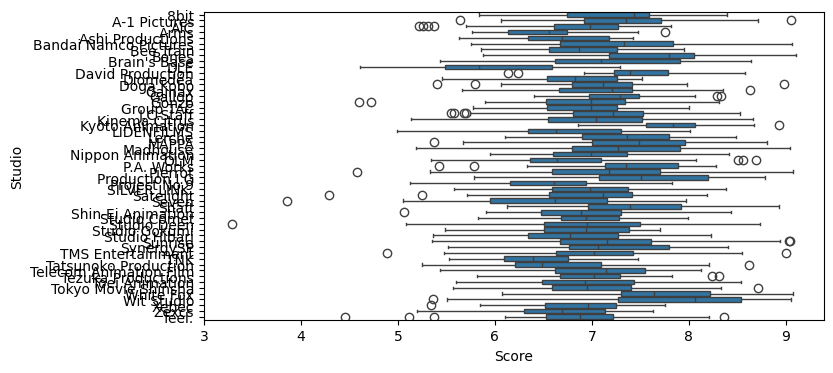

In [93]:
for y in category_cols:
    plot_categories('Score',y)

## Genre Analysis
As genre is a many-to-many relationship, it is not possible to express in a single column.

=================Action=================
Count: 1458


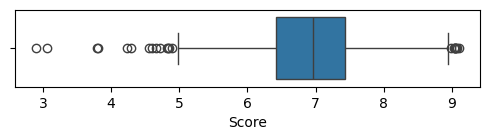

=================Adventure=================
Count: 995


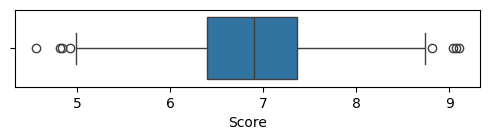

=================Avant Garde=================
Count: 18


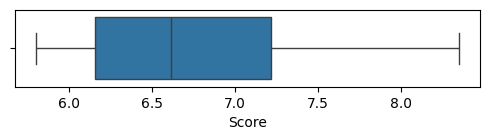

=================Award Winning=================
Count: 54


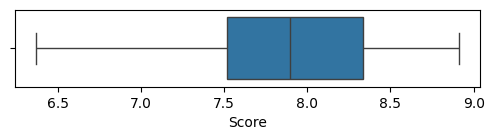

=================Boys Love=================
Count: 30


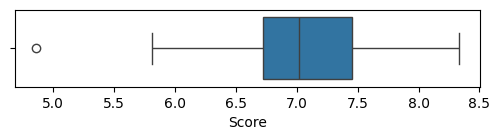

=================Comedy=================
Count: 1826


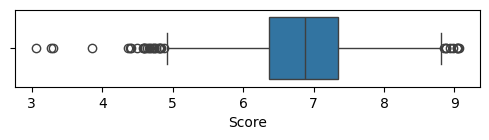

=================Drama=================
Count: 830


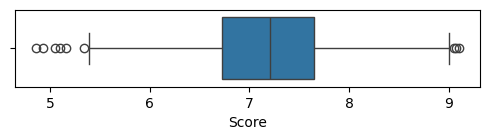

=================Fantasy=================
Count: 1091


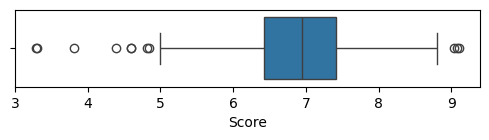

=================Girls Love=================
Count: 43


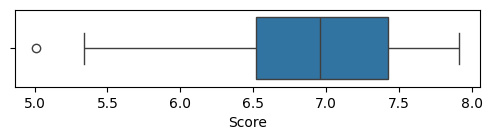

=================Gourmet=================
Count: 57


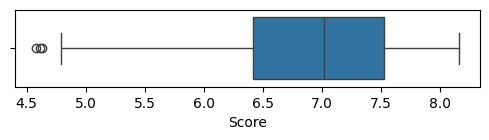

=================Horror=================
Count: 135


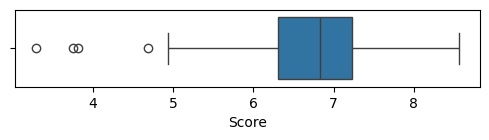

=================Mystery=================
Count: 318


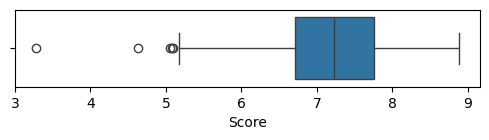

=================Romance=================
Count: 780


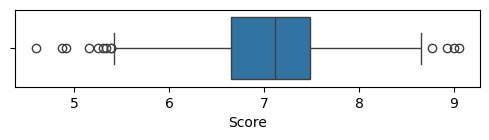

=================Sci-Fi=================
Count: 878


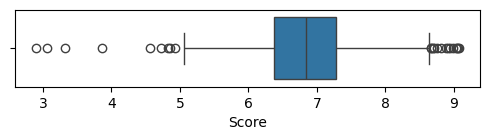

=================Slice of Life=================
Count: 449


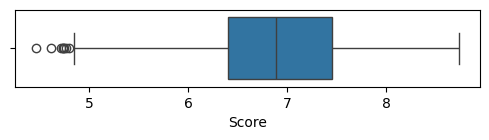

=================Sports=================
Count: 251


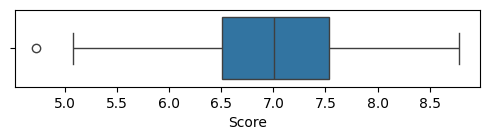

=================Supernatural=================
Count: 460


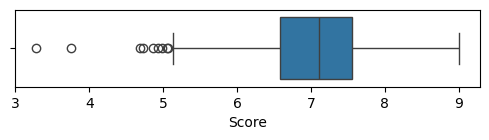

=================Suspense=================
Count: 75


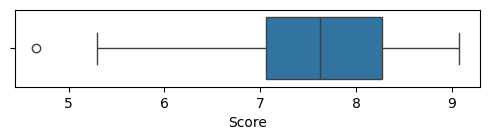

=================Ecchi=================
Count: 307


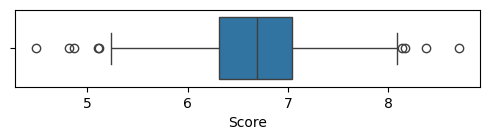

,Genre,Count,25,50,75
0,Action,1458,6.4200,6.960,7.4300
1,Adventure,995,6.4000,6.900,7.3600
2,Avant Garde,18,6.1550,6.615,7.2200
3,Award Winning,54,7.5150,7.895,8.3325
4,Boys Love,30,6.7225,7.020,7.4550
5,Comedy,1826,6.3700,6.880,7.3500
6,Drama,830,6.7300,7.205,7.6475
7,Fantasy,1091,6.4200,6.940,7.4150
8,Girls Love,43,6.5200,6.960,7.4250
9,Gourmet,57,6.4200,7.020,7.5300


In [94]:
# this will become the dataframe storing the genre stats
genre_stats = []

for genre in genres:
    print(f'================={genre}=================')
    df2 = df[df[genre]==True]
    stats = [genre]

    # get count
    count = len(df2.index)
    stats.append(count)
    
    # get quantiles
    quantiles = [0.25,0.5,0.75]
    for quantile in quantiles:
        stats.append(df2['Score'].quantile(quantile))

    print(f'Count: {count}')

    plt.figure(figsize=(6,1))
    sb.boxplot(data=df2['Score'],orient='h')
    plt.show()

    genre_stats.append(stats)
    
genre_stats = pd.DataFrame(genre_stats,columns=['Genre','Count','25','50','75'])
genre_stats

## Ordinary Least Squares
We use popularity, and the encoded genres and studios. Using rank is cheating as it is based on score.

In [100]:
y = genres.copy()
y = y + studios
y.append('Popularity')

=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit Studio', 'Popul

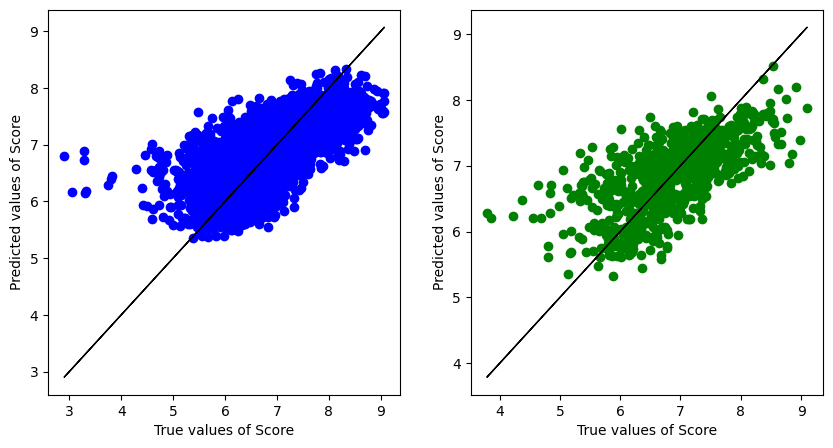

([0.43768927269110036, 0.4332403044745151],
 [0.36246019027182846, 0.3578257801499522])

In [101]:
linear_regression(x='Score',y=y,train_set=train_set, test_set=test_set)

# K Nearest Neighbours
This doesn't seem to work very well, we need a high value of k (around 30) to get a decent R^2, suggesting too much generalisation

In [102]:
def knn(x:str, y:str, train_set:object, test_set:object, k:int):
    """does K nearest Neighbour regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @param k: The number of neighbours
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    neighreg = KNeighborsRegressor(n_neighbors=k)
    # check if list
    if type(y) is list:
        neighreg.fit(train_set[y],train_set[[x]])
    else:
        neighreg.fit(train_set[[y]],train_set[[x]])


    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = neighreg.predict(datay)
        
        r2 = neighreg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}
        """)
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

=== k = 5 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit S

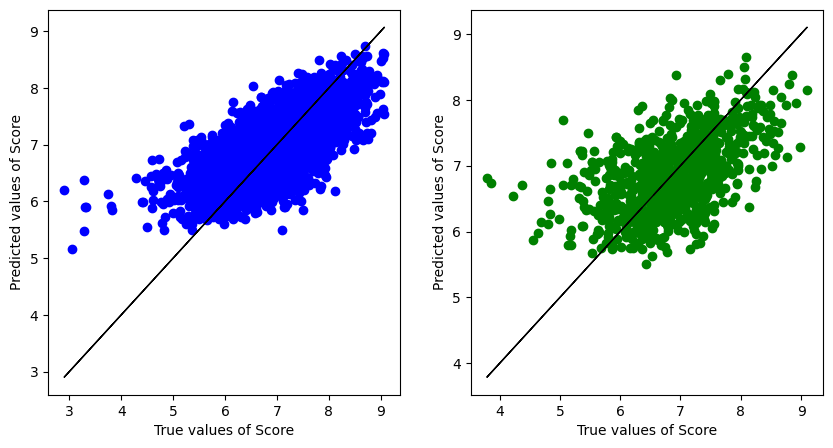

=== k = 10 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

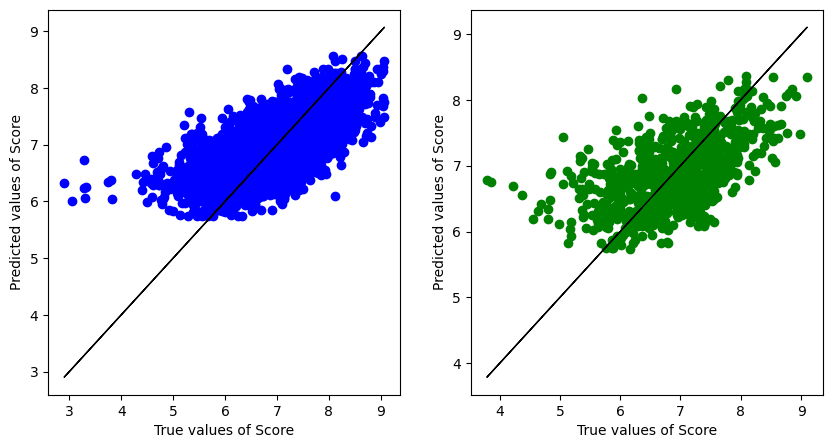

=== k = 15 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

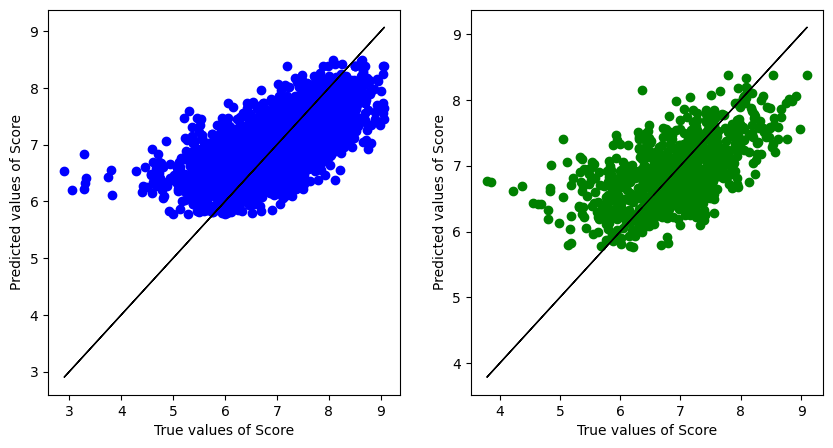

=== k = 20 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

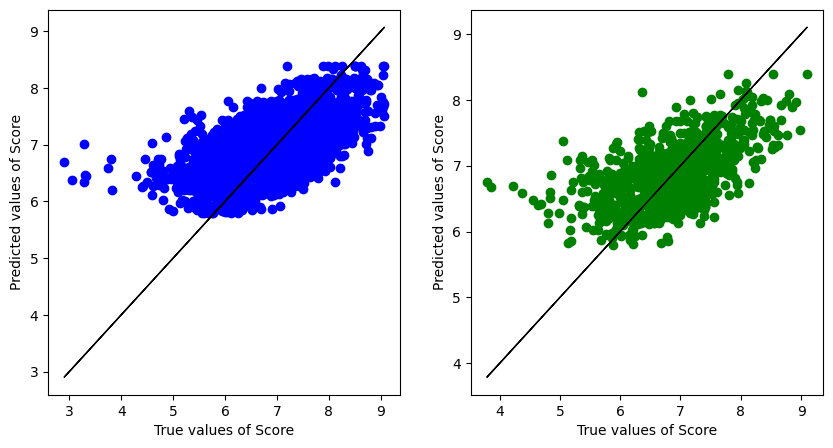

=== k = 25 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

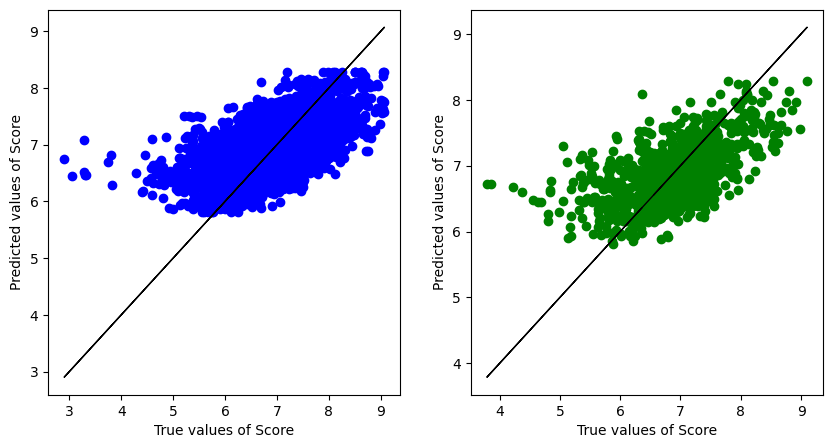

=== k = 30 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Toei Animation', 'Sunrise', 'J.C.Staff', 'Madhouse', 'Studio Deen', 'TMS Entertainment', 'Nippon Animation', 'Pierrot', 'A-1 Pictures', 'OLM', 'Tatsunoko Production', 'Production I.G', 'Gonzo', 'Xebec', 'Bones', 'SILVER LINK.', 'Satelight', 'Doga Kobo', 'Shaft', "Brain's Base", 'LIDENFILMS', 'Group TAC', 'MAPPA', 'Shin-Ei Animation', 'feel.', 'Diomedéa', 'AIC', 'Studio Comet', 'Zexcs', 'Kyoto Animation', 'Lerche', 'Tokyo Movie Shinsha', 'P.A. Works', 'Gallop', 'Ashi Productions', 'Studio Hibari', '8bit', 'DLE', 'Tezuka Productions', 'Seven', 'Studio Gokumi', 'Bandai Namco Pictures', 'Gainax', 'Bee Train', 'Kinema Citrus', 'SynergySP', 'Arms', 'Project No.9', 'David Production', 'TNK', 'Telecom Animation Film', 'White Fox', 'Wit 

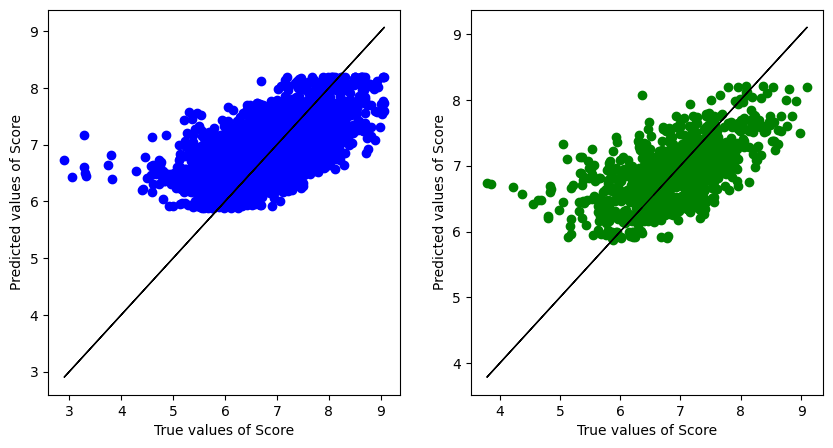

In [113]:
for i in range(5,35,5):
    print(f'=== k = {i} ===')
    knn(x='Score',y=y,train_set=train_set, test_set=test_set, k=i)

# Decision Tree
This seems to perform worse than Ordinary Least Squares, despite testing multiple depths.

In [104]:
def tree(x:str, y:str, train_set:object, test_set:object, max_depth:int=None):
    """does decision tree regression of variable y in the dataset against x. Can accept a list as y.
    @param x: The variable we want to predict
    @param y: The list of variables to perform regression on.
    @param train_set: The set used for training the model.
    @param test_set: The set used to test the model's accuracy.
    @param max_depth: maximum depth of tree
    @returns R^2: The R^2 values of the model, train set then test set.
    @returns MSE: The MSE values of the model, train set then test set."""

    print(f'=============== {y} ===============')
    treereg = DecisionTreeRegressor(max_depth=max_depth)
    # check if list
    if type(y) is list:
        treereg.fit(train_set[y],train_set[[x]])
    else:
        treereg.fit(train_set[[y]],train_set[[x]])

    datasets = {'train':train_set, 'test':test_set}
    results = {}

    r2_arr = []
    mse_arr = []
    
    for name,dataset in datasets.items():
        if type(y) is list:
            datay = dataset[y]
        else:
            datay = dataset[[y]]
        pred = treereg.predict(datay)
        
        r2 = treereg.score(datay, dataset[[x]])
        mse = mean_squared_error(dataset[[x]], pred)

        r2_arr.append(r2)
        mse_arr.append(mse)

        print(f"""{name} dataset
        R^2: {r2}
        MSE: {mse}
        """)
        results[name] = pred

    prediction_plot(x,train_set,test_set,results)

    return r2_arr, mse_arr

=== DEPTH = 3 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.36710528280173316
        MSE: 0.4079579643012942
        
test dataset
        R^2: 0.3493388377150346
        MSE: 0.41079727412871986
        


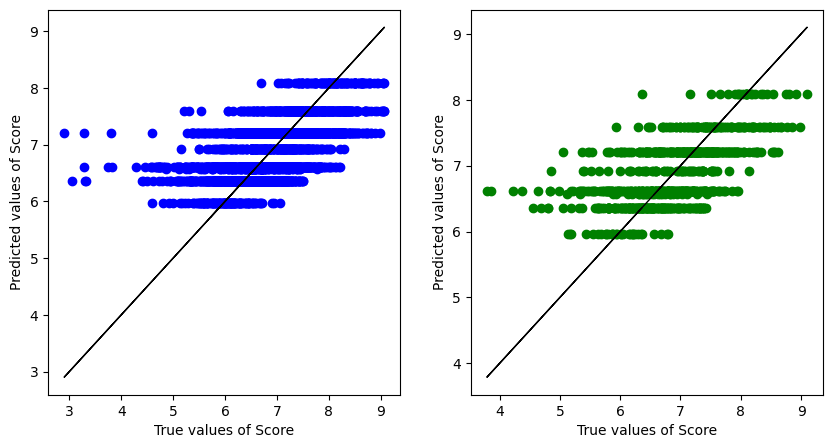

=== DEPTH = 4 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.3974222146143751
        MSE: 0.3884159560492771
        
test dataset
        R^2: 0.37906141988339226
        MSE: 0.3920318145584117
        


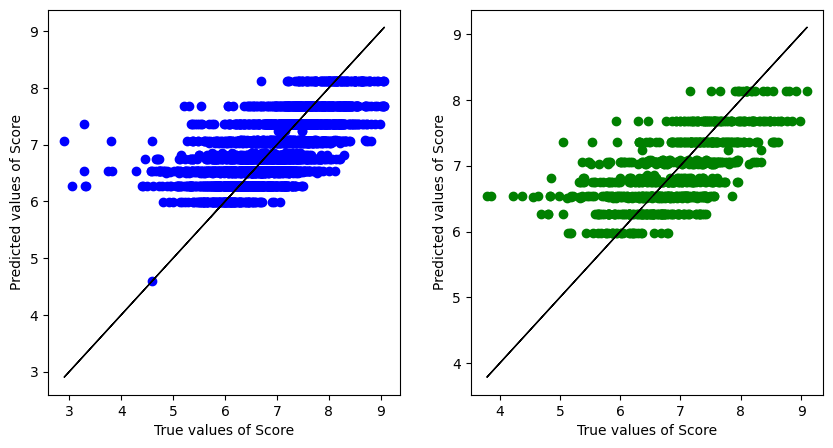

=== DEPTH = 5 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.4212796319867226
        MSE: 0.373037689869722
        
test dataset
        R^2: 0.38711880879037663
        MSE: 0.3869447529794473
        


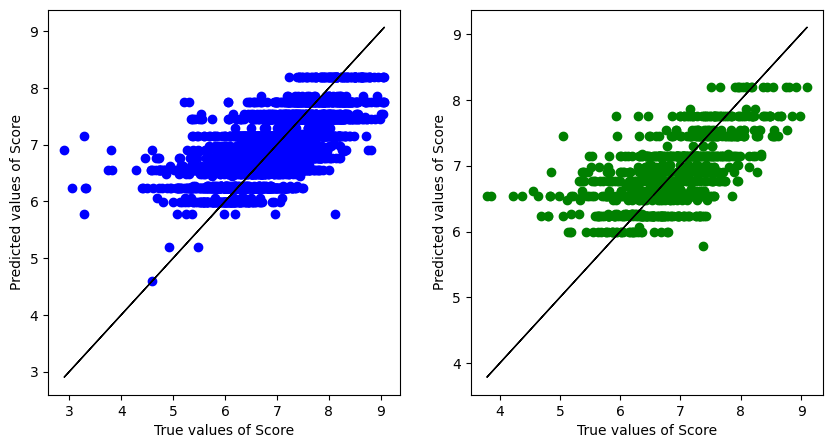

=== DEPTH = 6 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.4523559405869175
        MSE: 0.35300619450402004
        
test dataset
        R^2: 0.3971977423121642
        MSE: 0.3805813819088046
        


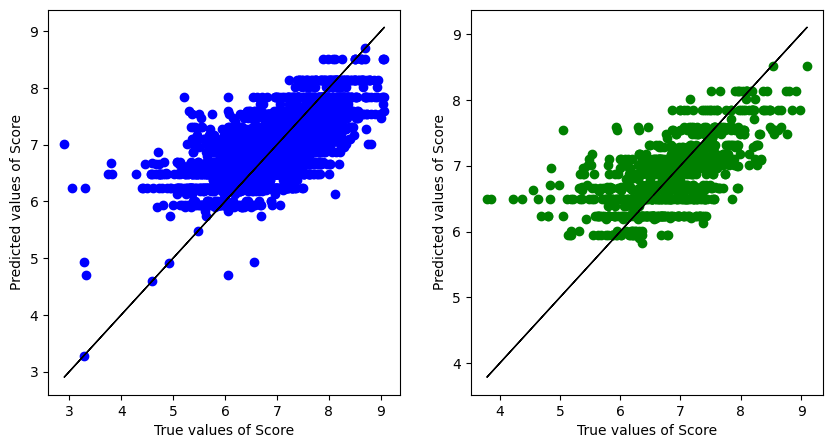

=== DEPTH = 7 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.48806147447896353
        MSE: 0.32999074418493207
        
test dataset
        R^2: 0.3892231196185517
        MSE: 0.3856161887401155
        


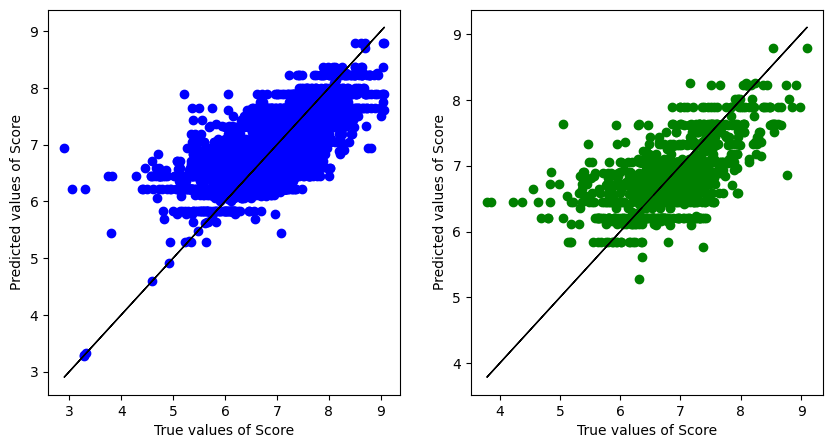

=== DEPTH = 8 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.5279266781835721
        MSE: 0.3042940099448614
        
test dataset
        R^2: 0.38975079892553566
        MSE: 0.38528303650437745
        


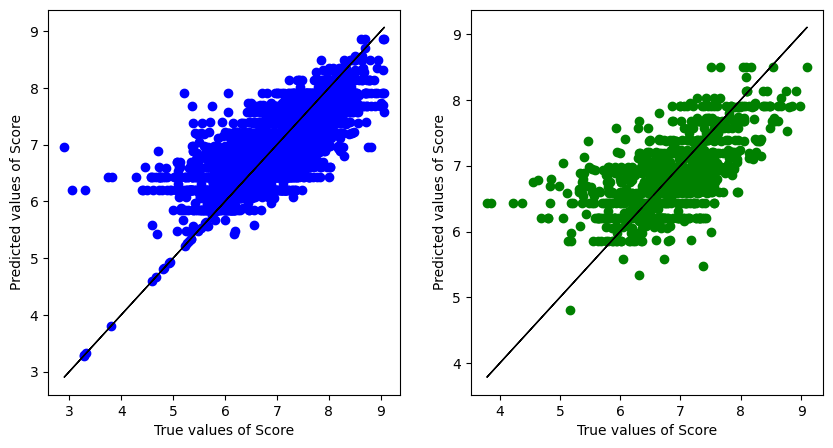

=== DEPTH = 9 ===
=============== ['Action', 'Adventure', 'Avant Garde', 'Award Winning', 'Boys Love', 'Comedy', 'Drama', 'Fantasy', 'Girls Love', 'Gourmet', 'Horror', 'Mystery', 'Romance', 'Sci-Fi', 'Slice of Life', 'Sports', 'Supernatural', 'Suspense', 'Ecchi', 'Popularity'] ===============
train dataset
        R^2: 0.5620291881160113
        MSE: 0.28231185374802864
        
test dataset
        R^2: 0.3563043140681802
        MSE: 0.406399595483153
        


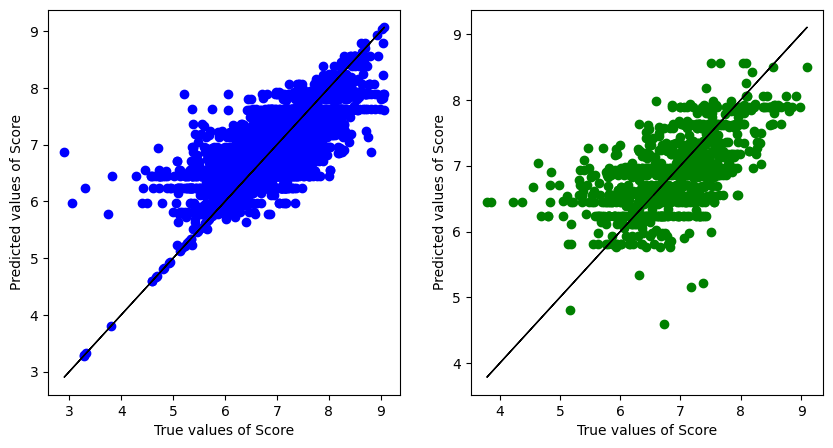

In [99]:
for i in range (3,10):
    print(f'=== DEPTH = {i} ===')
    tree(x='Score',y=y,train_set=train_set, test_set=test_set, max_depth=i)